<h1 style="color: #FF6347;">Importing General Libraries</h1>

In [43]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Create Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

In [37]:
# LazyRegressor libraries
from lazypredict.Supervised import LazyRegressor

In [33]:
# ExtraTreesRegressor Model Libraries
from sklearn.ensemble import ExtraTreesRegressor

In [555]:
# Export Model Libraries
import pickle

<h1 style="color: #FF6347;">Exploring the Data (First impression)</h1>

In [4]:
# Path to CSV file
file_path = 'Madrid_sale.csv'

# Load the file into a DataFrame
df = pd.read_csv(file_path)

In [5]:
df.T

,1,2,3,4,5,6,7,8,9,10,...,94806,94807,94808,94809,94810,94811,94812,94813,94814,94815
Unnamed: 0,A15019136831406238029,A6677225905472065344,A13341979748618524775,A4775182175615276542,A2492087730711701973,A18372428154681111419,A4705946410795464036,A8243762537477781718,A9587449507628658013,A3694300518337702967,...,A6905855462280780825,A7034851435465452892,A10324853219120899544,A8974485819301533463,A8870664464301737677,A3962186799478940177,A3876164367053781729,A17768295786772492698,A15733144649359668635,A9716488392839016117
ASSETID,201803,201803,201803,201803,201803,201803,201803,201803,201803,201803,...,201812,201812,201812,201812,201812,201812,201812,201803,201806,201812
PERIOD,126000.0,235000.0,373000.0,284000.0,228000.0,498000.0,225000.0,365000.0,425000.0,3187000.0,...,174000.0,229000.0,293000.0,196000.0,338000.0,347000.0,311000.0,342000.0,146000.0,334000.0
PRICE,2680.851064,4351.851852,4973.333333,5916.666667,4560.0,3921.259843,6428.571429,3650.0,6071.428571,8852.777778,...,2047.058824,1908.333333,2738.317757,5939.393939,3281.553398,3017.391304,3344.086022,2826.446281,2354.83871,3591.397849
UNITPRICE,47,54,75,48,50,127,35,100,70,360,...,85,120,107,33,103,115,93,121,62,93
CONSTRUCTEDAREA,1,1,2,1,0,3,0,2,1,4,...,0,3,3,0,2,3,2,2,3,3
ROOMNUMBER,1,1,1,1,1,2,1,1,1,3,...,2,2,2,1,1,2,2,2,1,1
BATHNUMBER,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,1,1,0,1,0,1
HASTERRACE,1,0,0,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
HASLIFT,1,0,1,1,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,0,1


In [6]:
# Realize that the columns are displaced and we put them in order
columnas_actuales = df.columns.tolist()

# Change each column to the name of the next
columnas_nuevas = columnas_actuales[1:] + ["ULTIMA"]  # Desplazar nombres hacia la derecha y agregar `None` al final

# Assign the new names to the DataFrame
df.columns = columnas_nuevas

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,94815.00,396110.11,417074.41,21000.00,160000.00,262000.00,467000.00,8133000.00
CONSTRUCTEDAREA,94815.00,101.40,67.08,21.00,62.00,83.00,117.00,985.00
ROOMNUMBER,94815.00,2.58,1.24,0.00,2.00,3.00,3.00,93.00
BATHNUMBER,94815.00,1.59,0.84,0.00,1.00,1.00,2.00,20.00
CONSTRUCTIONYEAR,94815.00,1966.64,35.86,1.00,1968.00,1968.00,1968.00,2291.00
DISTANCE_TO_CITY_CENTER,94815.00,4.49,2.99,0.01,2.41,4.12,6.21,415.75
DISTANCE_TO_METRO,94815.00,0.48,1.43,0.00,0.21,0.33,0.52,399.48
DISTANCE_TO_CASTELLANA,94815.00,2.68,2.58,0.00,1.04,1.96,3.84,412.80


In [39]:
df.dtypes

PRICE                            float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                         int64
BATHNUMBER                         int64
HASTERRACE                          bool
HASLIFT                             bool
HASAIRCONDITIONING                  bool
HASPARKINGSPACE                     bool
ISPARKINGSPACEINCLUDEDINPRICE       bool
HASNORTHORIENTATION                 bool
HASSOUTHORIENTATION                 bool
HASEASTORIENTATION                  bool
HASWESTORIENTATION                  bool
HASBOXROOM                          bool
HASWARDROBE                         bool
HASSWIMMINGPOOL                     bool
HASDOORMAN                          bool
HASGARDEN                           bool
ISDUPLEX                            bool
ISSTUDIO                            bool
ISINTOPFLOOR                        bool
CONSTRUCTIONYEAR                 float64
DISTANCE_TO_CITY_CENTER          float64
DISTANCE_TO_METRO                float64
DISTANCE_TO_CAST

In [9]:
### booleans
print(df["HASTERRACE"].value_counts())
print(df["HASLIFT"].value_counts())
print(df["HASPARKINGSPACE"].value_counts())
print(df["HASNORTHORIENTATION"].value_counts())
print(df["HASSOUTHORIENTATION"].value_counts())
print(df["HASWESTORIENTATION"].value_counts())
print(df["HASBOXROOM"].value_counts())
print(df["HASWARDROBE"].value_counts())
print(df["HASSWIMMINGPOOL"].value_counts())
print(df["HASDOORMAN"].value_counts())
print(df["HASGARDEN"].value_counts())
print(df["ISDUPLEX"].value_counts())
print(df["ISSTUDIO"].value_counts())
print(df["BUILTTYPEID_1"].value_counts())
print(df["BUILTTYPEID_2"].value_counts())
print(df["HASAIRCONDITIONING"].value_counts())
print(df["ISPARKINGSPACEINCLUDEDINPRICE"].value_counts())
print(df["ISINTOPFLOOR"].value_counts())
print(df["BUILTTYPEID_3"].value_counts())

#nonbooleans
print(df["AMENITYID"].value_counts())
print(df["PARKINGSPACEPRICE"].value_counts())
print(df["FLATLOCATIONID"].value_counts())
print(df["CADCONSTRUCTIONYEAR"].value_counts())
print(df["CADMAXBUILDINGFLOOR"].value_counts())
print(df["CADDWELLINGCOUNT"].value_counts())

HASTERRACE
0    61131
1    33684
Name: count, dtype: int64
HASLIFT
1    65953
0    28862
Name: count, dtype: int64
HASPARKINGSPACE
0    73472
1    21343
Name: count, dtype: int64
HASNORTHORIENTATION
0    84592
1    10223
Name: count, dtype: int64
HASSOUTHORIENTATION
0    72427
1    22388
Name: count, dtype: int64
HASWESTORIENTATION
0    80739
1    14076
Name: count, dtype: int64
HASBOXROOM
0    70272
1    24543
Name: count, dtype: int64
HASWARDROBE
1    54235
0    40580
Name: count, dtype: int64
HASSWIMMINGPOOL
0    80767
1    14048
Name: count, dtype: int64
HASDOORMAN
0    71151
1    23664
Name: count, dtype: int64
HASGARDEN
0    77319
1    17496
Name: count, dtype: int64
ISDUPLEX
0    92313
1     2502
Name: count, dtype: int64
ISSTUDIO
0    92203
1     2612
Name: count, dtype: int64
BUILTTYPEID_1
0    91933
1     2882
Name: count, dtype: int64
BUILTTYPEID_2
0    77126
1    17689
Name: count, dtype: int64
HASAIRCONDITIONING
0    52281
1    42534
Name: count, dtype: int64
ISPARKINGSPAC

In [10]:
print(df["ROOMNUMBER"].value_counts())
print(df["BATHNUMBER"].value_counts())
print(df["CONSTRUCTIONYEAR"].value_counts())

ROOMNUMBER
3     33961
2     28422
1     13338
4     11674
5      3350
0      2745
6       789
7       279
8       142
9        35
10       24
12       18
11       16
13        6
14        5
15        3
20        2
18        2
16        2
93        1
33        1
Name: count, dtype: int64
BATHNUMBER
1     53583
2     31352
3      6673
4      2132
5       722
6       159
0        89
7        39
8        28
11       15
10        7
9         7
14        2
12        2
13        2
16        1
18        1
20        1
Name: count, dtype: int64
CONSTRUCTIONYEAR
1960.0    2313
1970.0    2095
1965.0    1825
1900.0    1643
1950.0     862
          ... 
48.0         1
1655.0       1
350.0        1
1067.0       1
225.0        1
Name: count, Length: 191, dtype: int64


<h1 style="color: #FF6347;">Data Cleaning</h1>

<h3 style="color: #FF6347;">Convert to booleans</h3>

In [11]:
columnas_a_convertir = ["HASTERRACE", 
                        "HASLIFT", 
                        "HASPARKINGSPACE", 
                        "HASNORTHORIENTATION", 
                        "HASSOUTHORIENTATION",
                        "HASEASTORIENTATION",
                        "HASWESTORIENTATION", 
                        "HASBOXROOM", 
                        "HASWARDROBE", 
                        "HASSWIMMINGPOOL", 
                        "HASDOORMAN", 
                        "HASGARDEN", 
                        "ISDUPLEX", 
                        "ISSTUDIO", 
                        "BUILTTYPEID_1", 
                        "BUILTTYPEID_2", 
                        "HASAIRCONDITIONING", 
                        "ISPARKINGSPACEINCLUDEDINPRICE", 
                        "ISINTOPFLOOR", 
                        "BUILTTYPEID_3"]
                        
# Convert those columns to bool type
df[columnas_a_convertir] = df[columnas_a_convertir].astype(bool)

In [12]:
df.dtypes
#rooms 0-93
#bathrooms 0-20

ASSETID                           object
PERIOD                             int64
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                         int64
BATHNUMBER                         int64
HASTERRACE                          bool
HASLIFT                             bool
HASAIRCONDITIONING                  bool
AMENITYID                          int64
HASPARKINGSPACE                     bool
ISPARKINGSPACEINCLUDEDINPRICE       bool
PARKINGSPACEPRICE                  int64
HASNORTHORIENTATION                 bool
HASSOUTHORIENTATION                 bool
HASEASTORIENTATION                  bool
HASWESTORIENTATION                  bool
HASBOXROOM                          bool
HASWARDROBE                         bool
HASSWIMMINGPOOL                     bool
HASDOORMAN                          bool
HASGARDEN                           bool
ISDUPLEX                            bool
ISSTUDIO        

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PERIOD,94815.0,201808.613289,3.684625,201803.000000,201806.000000,201809.000000,201812.000000,2.018120e+05
PRICE,94815.0,396110.109160,417074.407623,21000.000000,160000.000000,262000.000000,467000.000000,8.133000e+06
UNITPRICE,94815.0,3661.051534,1700.499398,805.309735,2240.000000,3480.000000,4744.623034,9.997561e+03
CONSTRUCTEDAREA,94815.0,101.397163,67.078259,21.000000,62.000000,83.000000,117.000000,9.850000e+02
ROOMNUMBER,94815.0,2.580900,1.244878,0.000000,2.000000,3.000000,3.000000,9.300000e+01
BATHNUMBER,94815.0,1.585456,0.843024,0.000000,1.000000,1.000000,2.000000,2.000000e+01
AMENITYID,94815.0,2.922660,0.314865,1.000000,3.000000,3.000000,3.000000,3.000000e+00
PARKINGSPACEPRICE,94815.0,719.872668,7513.876356,1.000000,1.000000,1.000000,1.000000,9.250010e+05
CONSTRUCTIONYEAR,38942.0,1964.693493,55.891001,1.000000,1955.000000,1968.000000,1987.000000,2.291000e+03
FLOORCLEAN,90969.0,2.747903,2.257536,-1.000000,1.000000,2.000000,4.000000,1.100000e+01


<h3 style="color: #FF6347;">Drop some columns</h3>

In [14]:
df=df.drop("ASSETID", axis=1)
df=df.drop("LONGITUDE", axis=1)
df=df.drop("LATITUDE", axis=1)
df=df.drop("geometry", axis=1)
df=df.drop("UNITPRICE", axis=1)
df=df.drop(["ULTIMA"], axis=1)
df=df.drop(["FLATLOCATIONID"], axis=1)
df=df.drop(["CADASTRALQUALITYID"], axis=1)

In [15]:
df=df.drop("PERIOD", axis=1)
df=df.drop("AMENITYID", axis=1)
df=df.drop("PARKINGSPACEPRICE", axis=1)
df=df.drop("FLOORCLEAN", axis=1)
df=df.drop("CADCONSTRUCTIONYEAR", axis=1)
df=df.drop(["CADMAXBUILDINGFLOOR"], axis=1)
df=df.drop(["CADDWELLINGCOUNT"], axis=1)
df=df.drop(["BUILTTYPEID_1"], axis=1)
df=df.drop(["BUILTTYPEID_2"], axis=1)
df=df.drop(["BUILTTYPEID_3"], axis=1)

<h3 style="color: #FF6347;">Search (NaN, duplicates...)</h3>

In [16]:
# Impute numeric columns with median
for col in ['CONSTRUCTIONYEAR']:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\EliteBook\AppData\Local\Temp\ipykernel_14424\1767809894.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [17]:
# Check for null values in each column
print(df.isnull().sum())

PRICE                            0
CONSTRUCTEDAREA                  0
ROOMNUMBER                       0
BATHNUMBER                       0
HASTERRACE                       0
HASLIFT                          0
HASAIRCONDITIONING               0
HASPARKINGSPACE                  0
ISPARKINGSPACEINCLUDEDINPRICE    0
HASNORTHORIENTATION              0
HASSOUTHORIENTATION              0
HASEASTORIENTATION               0
HASWESTORIENTATION               0
HASBOXROOM                       0
HASWARDROBE                      0
HASSWIMMINGPOOL                  0
HASDOORMAN                       0
HASGARDEN                        0
ISDUPLEX                         0
ISSTUDIO                         0
ISINTOPFLOOR                     0
CONSTRUCTIONYEAR                 0
DISTANCE_TO_CITY_CENTER          0
DISTANCE_TO_METRO                0
DISTANCE_TO_CASTELLANA           0
dtype: int64


<h3 style="color: #FF6347;">Formating Constructed Area</h3>

In [18]:
# c) Check for inconsistencies
# (Example: Ensure that the constructed area is not negative)
df = df[df['CONSTRUCTEDAREA'] >= 0]

<h1 style="color: #FF6347;">EDA (Exploratory Data Analysis)</h1>

In [19]:
# Show the result
df.T

,1,2,3,4,5,6,7,8,9,10,...,94806,94807,94808,94809,94810,94811,94812,94813,94814,94815
PRICE,126000.0,235000.0,373000.0,284000.0,228000.0,498000.0,225000.0,365000.0,425000.0,3187000.0,...,174000.0,229000.0,293000.0,196000.0,338000.0,347000.0,311000.0,342000.0,146000.0,334000.0
CONSTRUCTEDAREA,47,54,75,48,50,127,35,100,70,360,...,85,120,107,33,103,115,93,121,62,93
ROOMNUMBER,1,1,2,1,0,3,0,2,1,4,...,0,3,3,0,2,3,2,2,3,3
BATHNUMBER,1,1,1,1,1,2,1,1,1,3,...,2,2,2,1,1,2,2,2,1,1
HASTERRACE,False,False,False,False,False,False,False,True,False,True,...,False,True,False,False,True,True,False,True,False,True
HASLIFT,True,False,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
HASAIRCONDITIONING,True,False,True,True,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,False,True
HASPARKINGSPACE,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,False,False
ISPARKINGSPACEINCLUDEDINPRICE,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,False,False
HASNORTHORIENTATION,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,True,False,False,True


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 94815 entries, 1 to 94815
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PRICE                          94815 non-null  float64
 1   CONSTRUCTEDAREA                94815 non-null  int64  
 2   ROOMNUMBER                     94815 non-null  int64  
 3   BATHNUMBER                     94815 non-null  int64  
 4   HASTERRACE                     94815 non-null  bool   
 5   HASLIFT                        94815 non-null  bool   
 6   HASAIRCONDITIONING             94815 non-null  bool   
 7   HASPARKINGSPACE                94815 non-null  bool   
 8   ISPARKINGSPACEINCLUDEDINPRICE  94815 non-null  bool   
 9   HASNORTHORIENTATION            94815 non-null  bool   
 10  HASSOUTHORIENTATION            94815 non-null  bool   
 11  HASEASTORIENTATION             94815 non-null  bool   
 12  HASWESTORIENTATION             94815 

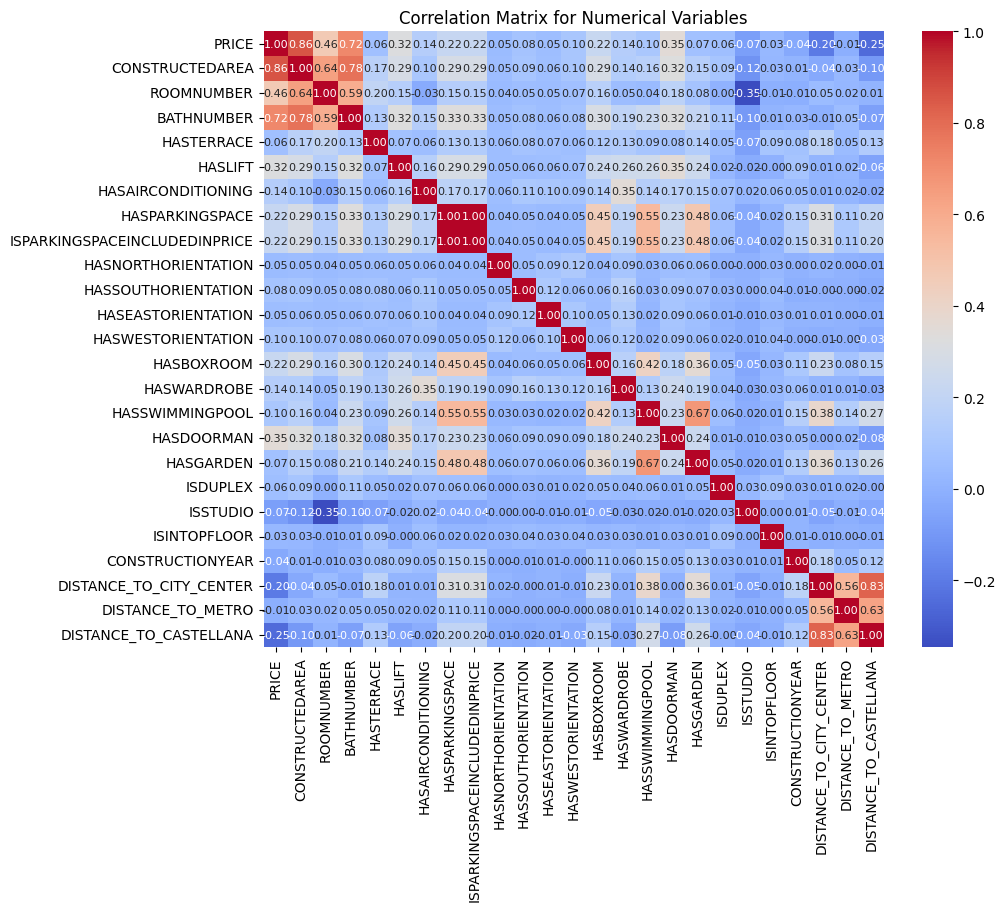

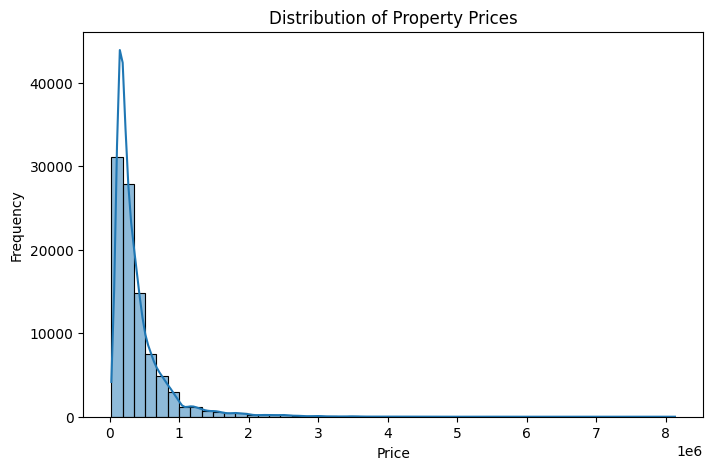

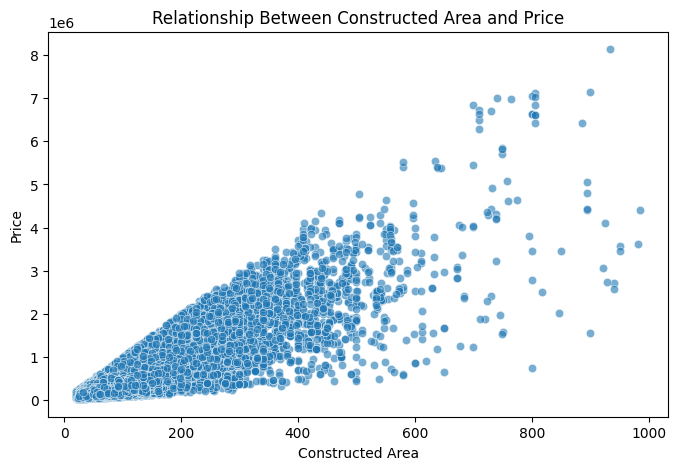

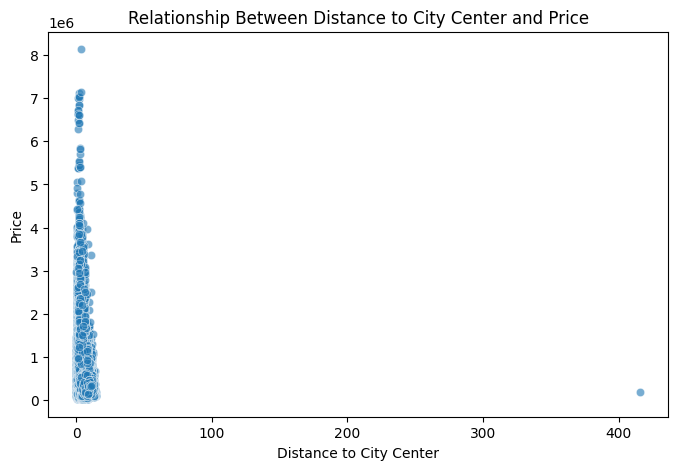

In [45]:
# 1. General information about the dataset
print("Dataset Info:")
print(df.info())

# 2. Distribution of missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# 3. Statistical summary of numerical variables
print("\nStatistical Summary of Numerical Variables:")
print(df.describe())

# 4. Distribution of boolean (categorical) variables
boolean_distribution = df.select_dtypes(include=['bool']).sum()
print("\nDistribution of Boolean Variables:")
print(boolean_distribution)

# 5. Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 8})
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

# 6. Distribution of property prices
plt.figure(figsize=(8, 5))
sns.histplot(df['PRICE'], kde=True, bins=50)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# 7. Relationship between constructed area and price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['CONSTRUCTEDAREA'], y=df['PRICE'], alpha=0.6)
plt.title("Relationship Between Constructed Area and Price")
plt.xlabel("Constructed Area")
plt.ylabel("Price")
plt.show()

# 8. Relationship between distance to city center and price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['DISTANCE_TO_CITY_CENTER'], y=df['PRICE'], alpha=0.6)
plt.title("Relationship Between Distance to City Center and Price")
plt.xlabel("Distance to City Center")
plt.ylabel("Price")
plt.show()


<h1 style="color: #FF6347;">Creating the training and test</h1>

In [22]:
X = df.drop("PRICE", axis=1)  # Characteristics
y = df["PRICE"]  # Label

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4800)

print(f"X_train: {len(X_train)} \n X_test: {len(X_test)} \n y_train: {len(y_train)} \n y_test: {len(y_test)}")

X_train: 66370 
 X_test: 28445 
 y_train: 66370 
 y_test: 28445


<h1 style="color: #FF6347;">Lazy Regresor: Looking for the best models</h1>

In [225]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 98%|████████████████████████████████████████████████████████████████████████████████  | 41/42 [37:42<01:28, 88.28s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1677
[LightGBM] [Info] Number of data points in the train set: 66370, number of used features: 15
[LightGBM] [Info] Start training from score 397269.624830


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [37:43<00:00, 53.89s/it]


In [226]:
models_lazy = models
print(models_lazy)

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
ExtraTreesRegressor                          0.94       0.94 103173.29   
RandomForestRegressor                        0.93       0.93 105906.61   
BaggingRegressor                             0.92       0.92 112790.16   
XGBRegressor                                 0.91       0.91 121196.50   
LGBMRegressor                                0.91       0.91 124331.40   
HistGradientBoostingRegressor                0.90       0.90 128165.17   
GradientBoostingRegressor                    0.88       0.88 142063.07   
DecisionTreeRegressor                        0.87       0.87 147241.04   
KNeighborsRegressor                          0.85       0.85 155990.67   
ExtraTreeRegressor                           0.85       0.85 158349.33   
HuberRegressor                               0.77       0.77 197029.37   
SGDRegressor                          

<h1 style="color: #FF6347;">Model ExtraTreesRegressor</h1>

In [24]:
# Create the model
etr = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model
etr.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [25]:
# Predict on the test set
y_pred_etr = etr.predict(X_test)

In [26]:
# Evaluation metrics
mse_etr = mean_squared_error(y_test, y_pred_etr)
rmse_etr = mse_etr ** 0.5
mae_etr = mean_absolute_error(y_test, y_pred_etr)
r2_etr = r2_score(y_test, y_pred_etr)

print(f"MSE: {mse_etr:.2f}")
print(f"RMSE: {rmse_etr:.2f}")
print(f"MAE: {mae_etr:.2f}")
print(f"R2 Score: {r2_etr:.2f}")

MSE: 11523465621.75
RMSE: 107347.41
MAE: 50693.91
R2 Score: 0.93


<h1 style="color: #FF6347;">Testing Model Manually</h1>

In [27]:
# Create the input as a DataFrame with the same columns as `X_test`
y_input = [80, 3, 1, False, False, True, False, False, False, False, True,
    True, False, False, False, False, False, False, False, False, 1980.00, 5.18, 0.66, 4.07]

# Get the columns of `X_test`
columnas = X_test.columns.tolist()

# Create a DataFrame for the sample
sample = pd.DataFrame(columns=columnas)
sample.loc[0] = y_input  # Add the input row

# Convert to a two-dimensional array
sample_array = sample.values.reshape(1, -1)

# Predict using the `etr` model
s_pred_etr = etr.predict(sample_array)

# Assuming that `s_pred_etr` contains the prediction as a numeric value
print("Prediction: {:,} €".format(int(s_pred_etr)).replace(',', '.'))
print("Range: {:,} € - {:,} €".format(int(s_pred_etr*(1-0.07)),(int(s_pred_etr*(1-0.07)))).replace(',', '.'))

Predicción: 105.760 €
Rango: 98.356 € - 98.356 €


C:\Users\EliteBook\anaconda3\envs\midproject2\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
C:\Users\EliteBook\AppData\Local\Temp\ipykernel_14424\3514794471.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicción: {:,} €".format(int(s_pred_etr)).replace(',', '.'))
C:\Users\EliteBook\AppData\Local\Temp\ipykernel_14424\3514794471.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Rango: {:,} € - {:,} €".format(int(s_pred_etr*(1-0.07)),(int(s_pred_etr*(1-0.07)))).replace(',', '.'))


In [32]:
df.sample(1).T

,4124
PRICE,157000.0
CONSTRUCTEDAREA,52
ROOMNUMBER,1
BATHNUMBER,1
HASTERRACE,True
HASLIFT,False
HASAIRCONDITIONING,True
HASPARKINGSPACE,False
ISPARKINGSPACEINCLUDEDINPRICE,False
HASNORTHORIENTATION,False


<h1 style="color: #FF6347;">Export Model</h1>

In [557]:
# Save the model to a file
with open('madrid_valuer_model.pkl', 'wb') as f:
    pickle.dump(etr, f)
print("Model saved successfully.")

Modelo guardado exitosamente.
